Generating a Random Variable, 2a. d/dx(1-e^-(x^2)) = 2xe^-(x^2)

Text(0, 0.5, 'density')

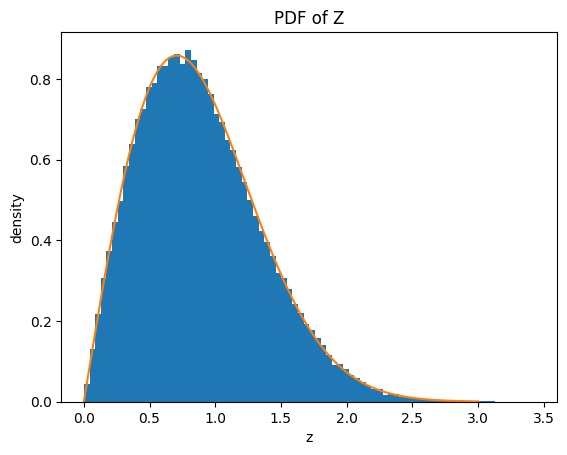

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

n = 100000  #Trials
samples = []
for i in range(n):  #Use the equation from 1a to sample z
    toAdd = random.random()
    toAdd = np.sqrt(-np.log(1-toAdd))
    samples.append(toAdd)

plt.hist(samples, bins=80, density=True, label='Empirical Density') # make a histogram with samples of z

x_values = []
step = 0.001
x=0
while x < 3:
    x_values.append(x)
    x+= step

x_values = np.array(x_values)
y_values = 2*x_values*np.exp(-(x_values**2)) #Derrivitive shown in markdown and write up
plt.plot(x_values,y_values) #Density plot to check our histogram
plt.title("PDF of Z")
plt.xlabel("z")
plt.ylabel("density")



Generating a Random Variable, 2d.

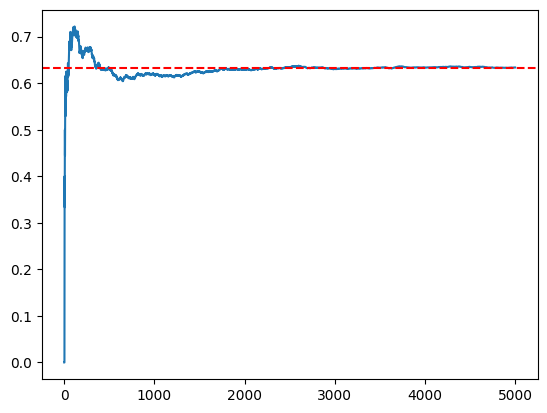

In [10]:
x = 1   # Testing when x is set to 1
n = 5000
expected = 1 - np.exp(-x**2)    ##True density at x = 1
CumSum = 0
averageSum= []
nList = []
for i in range(1,n+1):  #empirical denisrty
    trial = random.random()
    trial = np.sqrt(-np.log(1 - trial)) 
    if trial <= x:
        CumSum += 1
    averageSum.append((CumSum/i))
    nList.append(i)
plt.plot(nList,averageSum)  #empirical
plt.xlabel('N trials')
plt.axhline(y=expected, color='red', linestyle='--', label='Expected Value')    #expected

#They converge as n increases

Monte Carlo Integration, finding the integral empircally, 1a

In [90]:
a = 0
b = 3
n = 10000
Uk = np.random.uniform(a, b, n) #n random samples from 0-3 
Yk = np.sin(2 * np.pi * Uk) ** 2
mean = np.mean(Yk)
estimate = (b-a)*mean

print(f"mean = {mean}")
print(f"estimate = {estimate}")


mean = 0.5000152245295256
estimate = 1.500045673588577


Monter Carlo, 1b

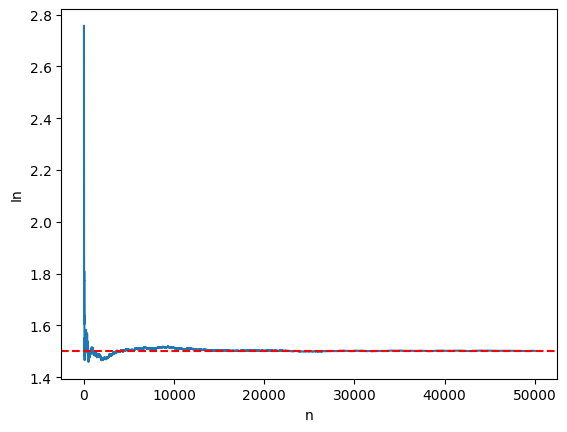

In [185]:
def func(x):
    return np.sin(2 * np.pi * x) ** 2
a = 0
b = 3
n = 20000
nList = []
total = 0
estimate = []
for i in range(1,n+1):
    trial = random.uniform(1,3)
    trial = func(trial)
    total+= trial
    estimate.append(3*(total/i))
    nList.append(i)
plt.plot(nList,estimate)
plt.xlabel("N trials")
plt.ylabel('In')
plt.axhline(y=1.5, color='red', linestyle='--', label='Expected Value')    #Converging near 1.5

Monte Carlo 4

Using Wolfram Alpha I found the true integral to be 1.5.

After running the trials below I found that the empirical probability of I - Ihat to be essentially 0. None of my trials with n set to 3458 was more than 1.5 away from the true integral. This is much smaller than the intitial 0.05 probability of this event occuring.


In [117]:
trueIntegral = 1.5
n = 3458
trials = 10000
count = 0
a=0
b=3
for i in range(trials):
    samples = np.random.uniform(a, b, n) #n random samples from 0-3
    samples = np.sin(2 * np.pi * samples) ** 2
    ave = samples.mean()
    trial = 3 * ave
    if abs(trial-trueIntegral) > 0.1:
        count += 1
print(f"Probability that I-Ihat is greater than 0.1 is: {count/trials}")
        
        

0
Probability that I-Ihat is greater than 0.1 is: 0.0


Density

Density 2a

/var/folders/8x/s5pgblcj1917hchbrz5n82200000gn/T/ipykernel_37907/1067421355.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  ret = (1/(8*np.sqrt(y)))*(np.exp((-1/4)*(3+np.sqrt(y)))+np.exp((-1/4)*(3-np.sqrt(y))))


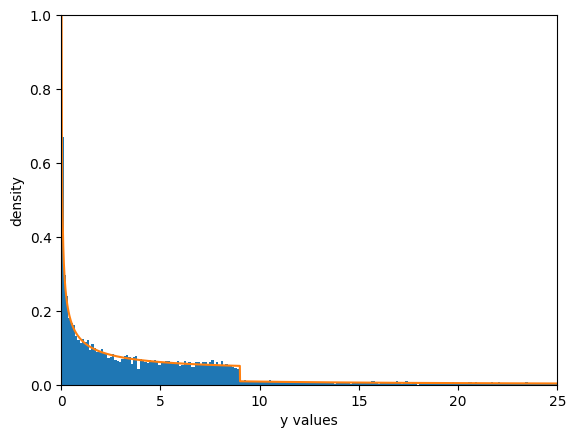

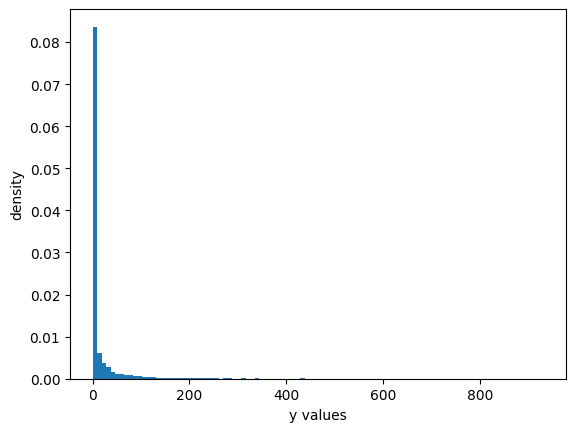

In [186]:
def lessThan9(y):
    #if y is less than 9 use this density function calculated in write up
    ret = (1/(8*np.sqrt(y)))*(np.exp((-1/4)*(3+np.sqrt(y)))+np.exp((-1/4)*(3-np.sqrt(y))))
    return ret

def greaterThan9(y):
    #if y is greater than 9 use this density function calculated in write up
    if y < 9:
        return 0
    ret = (1/(8*np.sqrt(y)))*(np.exp((-1/4)*(3+np.sqrt(y))))
    return ret


n = 10000
values = []
for i in range(n):  #Empirical density distribution
    u = random.random()
    x = -np.log(1-u)*4
    y = (x-3)**2
    values.append(y)
values = np.array(values)
plt.hist(values,bins = 8000,density=True)
plt.ylabel("density")
plt.xlabel("y values")
plt.xlim(0,25)
plt.ylim(0,1)



y_values = []
step = 0.01
x=0
x_values = []
while x < 30:   #Finding the densities of y from 0 to 30
    x_values.append(x)
    if x<9: #Checking which density function to apply
        y_values.append(lessThan9(x))
    else:
        y_values.append(greaterThan9(x))
    x+= step
plt.plot(x_values,y_values)
plt.show()
plt.ylabel("density")
plt.xlabel("y values")
plt.hist(values,bins = 100,density=True)
plt.show()



Density Extra Credit

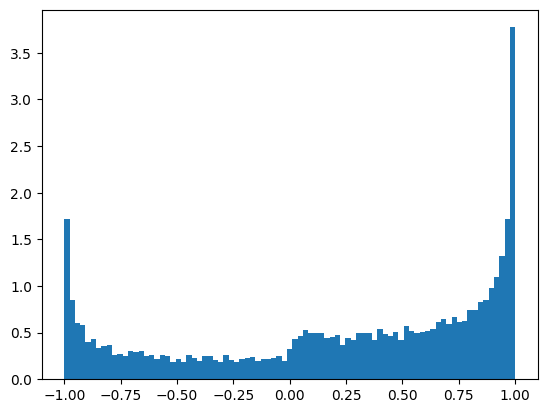

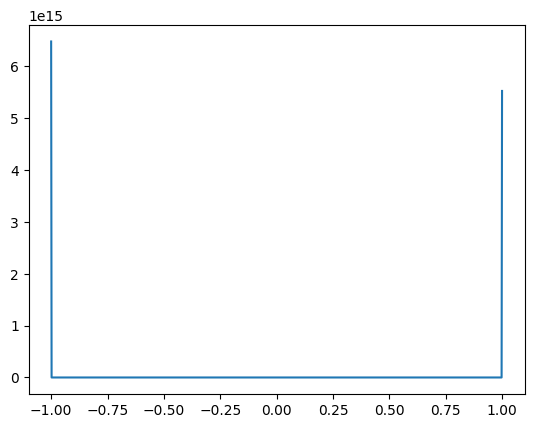

In [208]:
n = 10000
values = []
for i in range(10000):
    u = random.random()
    x = -np.log(1-u)*4
    y = np.sin(x)
    values.append(y)
values = np.array(values)
plt.hist(values,bins = 85,density=True)
def f_Y(y):
    return (1/abs(np.cos(np.arcsin(y))))*(1/4)*(np.exp((-1/4)*np.arcsin(y)))+(1/abs(np.cos(np.pi-np.arcsin(y))))*(1/4)*(np.exp((-1/4)*(np.pi-np.arcsin(y))))
y_values = np.linspace(-1, 1, 1000)
density_values = [f_Y(y) for y in y_values]
plt.show()
plt.plot(y_values,density_values)

# Plot the density function
#plt.plot(y_values, density_values)

Exploring Limit Theorems for Maximums 1 and 2

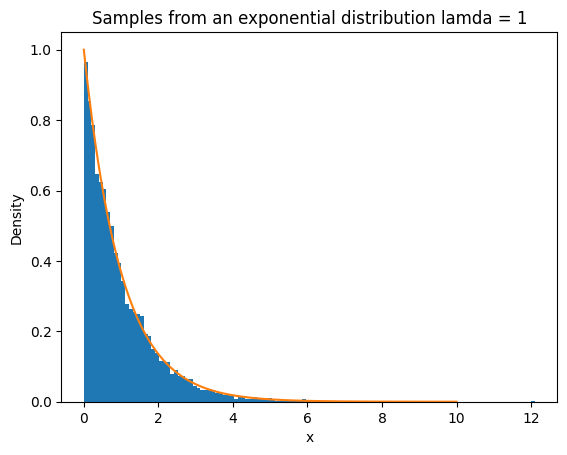

In [162]:

n = 10000
samples =[]
for i in range(n):#Getting random draws from exponential distribution with paramater 1
    trial = random.random()
    trial = -np.log(1-trial)
    samples.append(trial)

plt.hist(samples,bins=120,density=True)
x=0
xList = []
yList = []
while x < 10:   #Density function for paramater 1
    xList.append(x)
    yList.append(np.exp(-x))
    x+= 0.01
plt.title("Samples from an exponential distribution lamda = 1")
plt.xlabel('x')
plt.ylabel('Density')
plt.plot(xList,yList)

Maximums 3

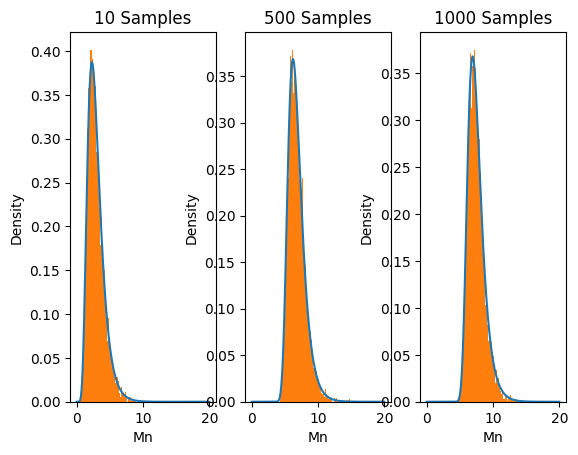

In [179]:

draws = 5000
n_values =[10,500,1000]
for index,n in enumerate(n_values):
    result = []
    for i in range(draws):
        nList = []
        for k in range(n):
            trial = random.random()
            trial = -np.log(1-trial)
            nList.append(trial)
        result.append(max(nList))
    xList = []
    yList = []
    x=0
    while x < 20:
        xList.append(x)
        y = n * (1 - np.exp(-x))**(n - 1) * np.exp(-x) #  Equation gotten in write up
        yList.append(y)
        x+=0.01
    
    plt.subplot(1, 3, index + 1)
    plt.plot(xList,yList)
    plt.xlabel("Mn")
    plt.ylabel("Density")
    plt.hist(result,bins=70,density=True)
    plt.title(f'{n} Samples')
plt.show()
        


Maximum 4 WARNING TAKES A LONG TIME TO RUN

Text(0, 0.5, 'Average of Mn')

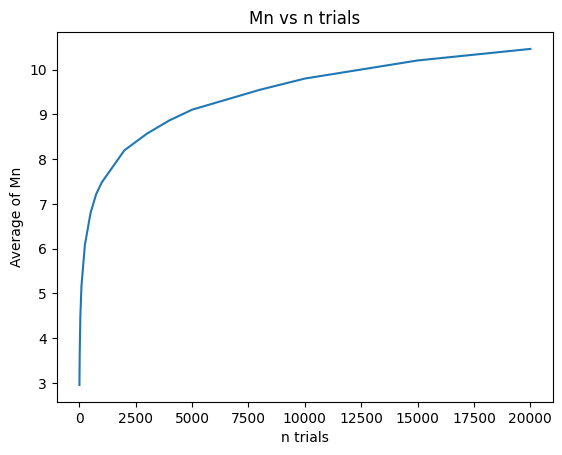

In [163]:
n_values = [10,20,50,100,250,500,750,1000,2000,3000,4000,5000,8000,10000,15000,20000]
Mn = []
copies = 5000
for n in n_values: 
    total = 0
    for i in range(copies): #For all given values of n do 5000 trials of groups of size n and get the max in each of those groups. 
            findMax = []
            for thing in range(n):
                trial = random.random()
                trial = -np.log(1-trial)
                findMax.append(trial)
            total += max(findMax)   
    Mn.append(total/copies) #Save average max across n trials

plt.plot(n_values,Mn)
plt.title("Mn vs n trials")
plt.xlabel("n trials")
plt.ylabel("Average of Mn")


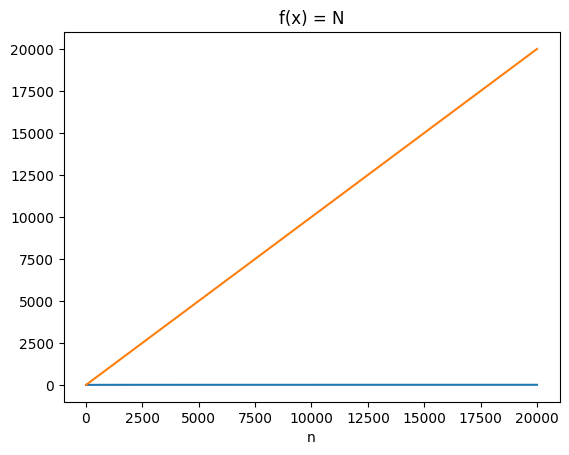

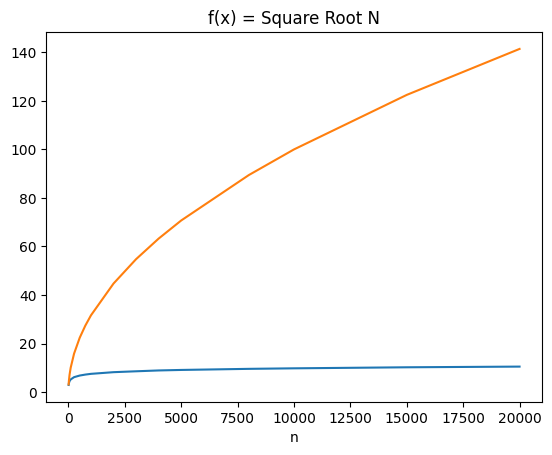

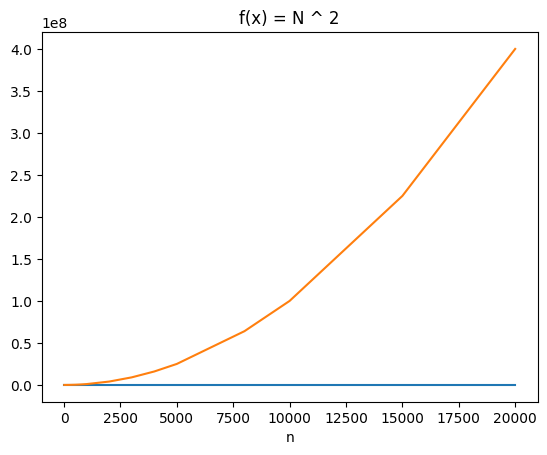

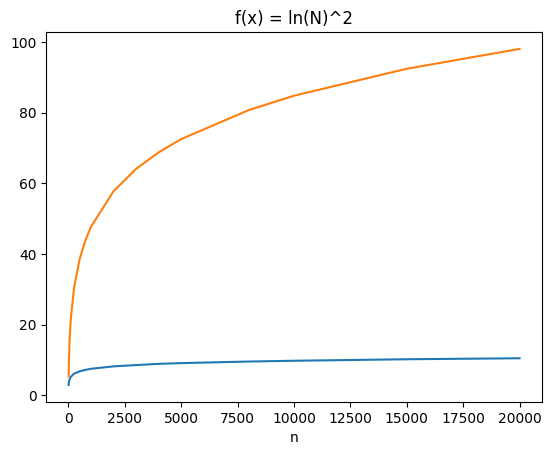

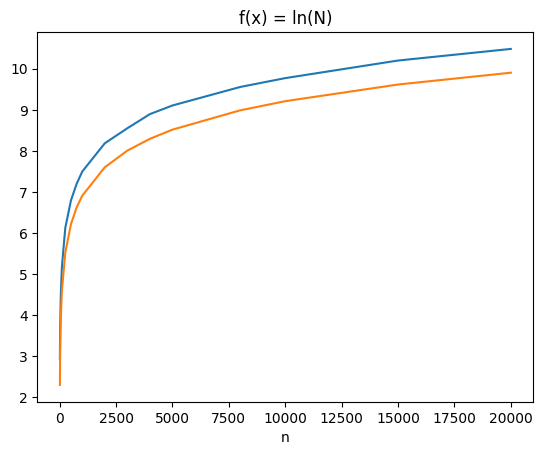

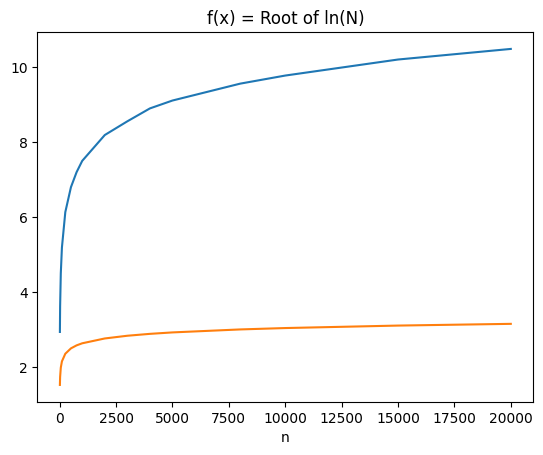

In [178]:
import math
n_values = [10,20,50,100,250,500,750,1000,2000,3000,4000,5000,8000,10000,15000,20000]
Mn = [np.float64(2.93100472295611), np.float64(3.6139583229015773), np.float64(4.494245894942282), np.float64(5.183345864576154), np.float64(6.128444475044938), np.float64(6.794167637359313), np.float64(7.194128361590672), np.float64(7.495900324238102), np.float64(8.185046087608741), np.float64(8.550946797854778), np.float64(8.895082494034051), np.float64(9.105429603057617), np.float64(9.555768362036806), np.float64(9.771807850108729), np.float64(10.199717040791542), np.float64(10.482491327957206)] #from last part so I dont have to run that many trials
EqualsN = []
EqualsRootN = []
EqualsNSquared=[]
EqualsLnOfNSquared=[]
EqualsLnOfN = []
EqualsRootofLnN = []
for n in n_values:
    EqualsN.append(n)
    EqualsRootN.append(math.sqrt(n))
    EqualsNSquared.append(n**2)
    EqualsLnOfNSquared.append((np.log(n))**2)
    EqualsLnOfN.append(np.log(n))
    EqualsRootofLnN.append(math.sqrt(np.log(n)))

plt.plot(n_values,Mn)   #plotting Mn across n for all plots
plt.plot(n_values,EqualsN)  #Plotting the functions given
plt.xlabel("n")
plt.title("f(x) = N")
plt.xlabel("n trials")
plt.show()

plt.plot(n_values,Mn)
plt.plot(n_values,EqualsRootN)
plt.xlabel("n")
plt.title("f(x) = Square Root N")
plt.xlabel("n trials")
plt.show()

plt.plot(n_values,Mn)
plt.plot(n_values,EqualsNSquared)
plt.xlabel("n")
plt.title("f(x) = N ^ 2")
plt.xlabel("n trials")
plt.show()

plt.plot(n_values,Mn)
plt.plot(n_values,EqualsLnOfNSquared)
plt.title("f(x) = ln(N)^2")
plt.xlabel("n")
plt.xlabel("n trials")
plt.show()

plt.plot(n_values,Mn)
plt.plot(n_values,EqualsLnOfN)
plt.title("f(x) = ln(N)")
plt.xlabel("n")
plt.xlabel("n trials")
plt.show()

plt.plot(n_values,Mn)
plt.plot(n_values,EqualsRootofLnN)
plt.title("f(x) = Root of ln(N)")
plt.xlabel("n trials")
plt.show()


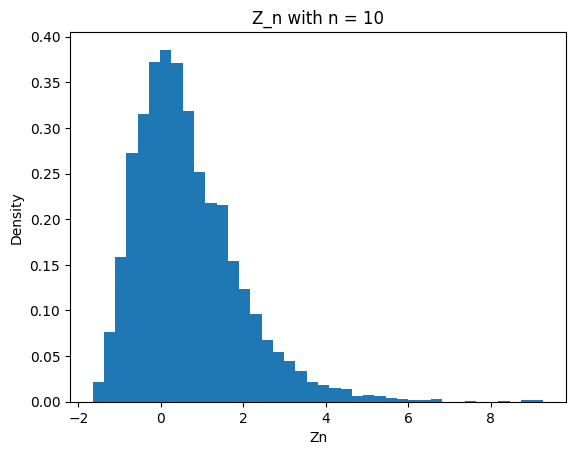

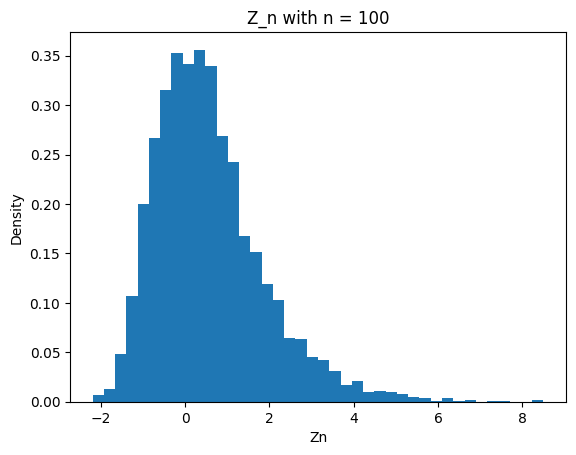

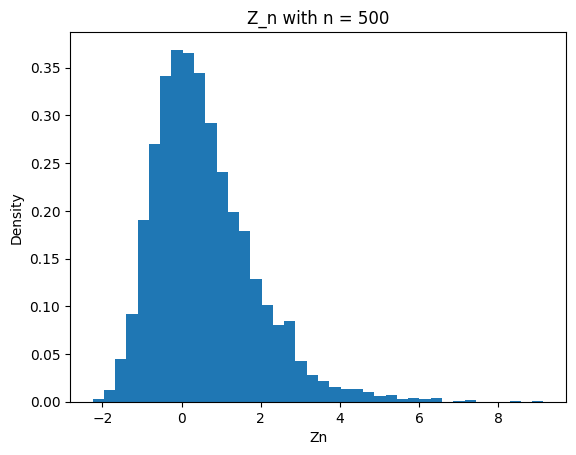

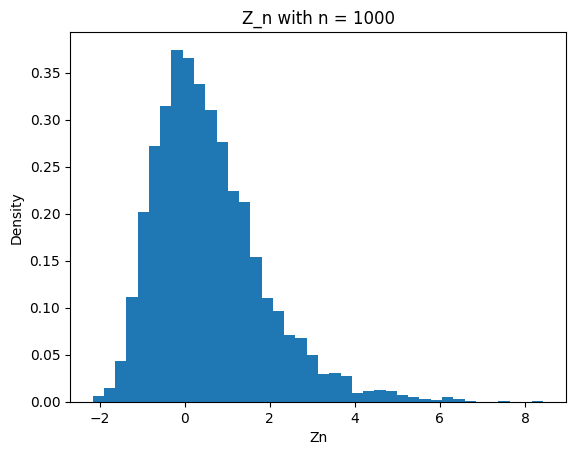

In [177]:

n_values = [10,100,500,1000]
samples = 5000
for n in n_values:
    Zn = []
    prediction = np.log(n)  #Expected value
    for i in range(samples):
        findMax= []
        for k in range(n):
            trial = random.random()
            trial = -np.log(1-trial)
            findMax.append(trial)
        Zn.append(max(findMax)-prediction)  #Difference between expected and observed
    plt.title(f"Z_n with n = {n}")
    plt.hist(Zn,bins=40,density=True)
    plt.ylabel("Density")
    plt.xlabel("Zn")
    plt.show()

As N increases the histogram seems to roughly stabilize. The peak seems to get sharper as n grows. Also there seems to be less density further away from the peak.

It doesnt look exactly normal as there seems to be a tail on the right side. Normal distributions should be more symmetrical.

While this distribution kind of looks like a poisson distribution it is continuos so that would not really make sense. The tail on the right does make it look like a Poisson distribution though



Maximums 6

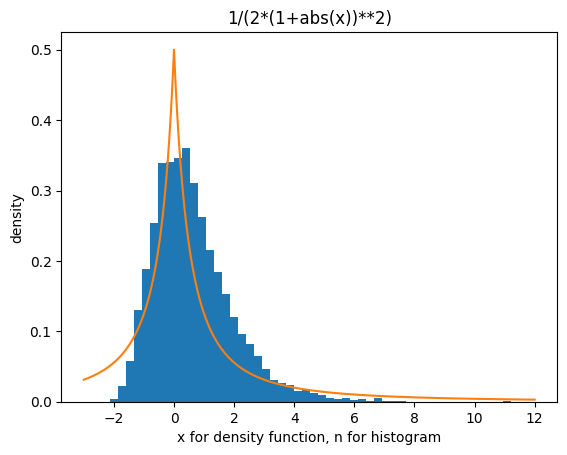

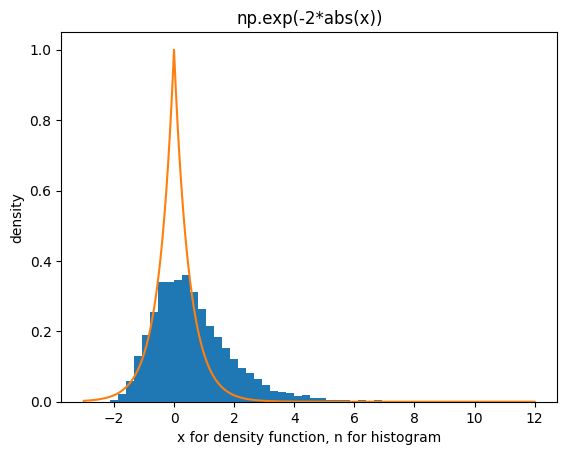

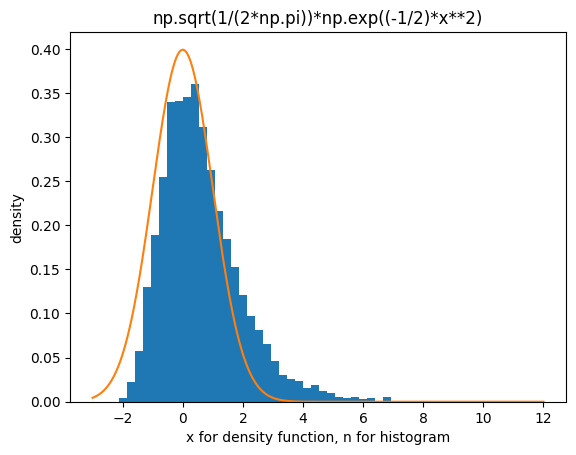

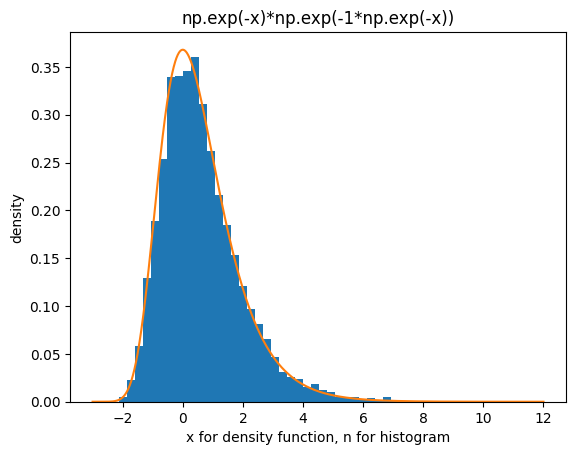

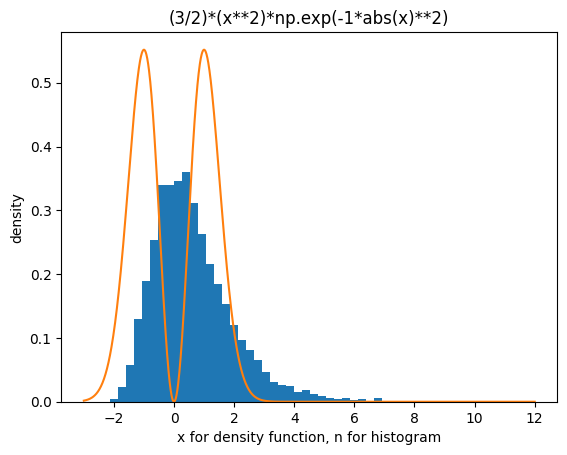

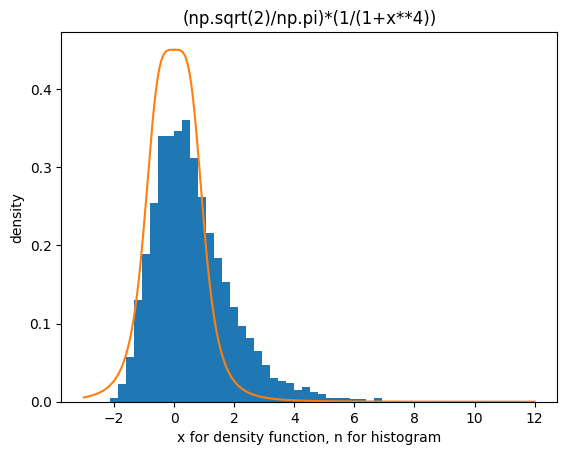

In [176]:

samples = 5000
n =1000
Zn = []
prediction = np.log(n) #Finding real value
for i in range(samples): #Randomly sampling 
    findMax= []
    for k in range(n):
        trial = random.random()
        trial = -np.log(1-trial)
        findMax.append(trial)   
    Zn.append(max(findMax)-prediction)#Appending difference between max and real value

one = lambda x: 1/(2*(1+abs(x))**2) #defining all of the functions
two = lambda x:np.exp(-2*abs(x))
three = lambda x:np.sqrt(1/(2*np.pi))*np.exp((-1/2)*x**2)
four = lambda x:np.exp(-x)*np.exp(-1*np.exp(-x))
five = lambda x:(3/2)*(x**2)*np.exp(-1*abs(x)**2)
six = lambda x:(np.sqrt(2)/np.pi)*(1/(1+x**4))
x=-3
x_list=[]
while x < 12:
    x_list.append(x)
    x+=0.01
x_list = np.array(x_list)
functions =  [one,two,three,four,five,six]

for i in range(6):
    plt.hist(Zn,bins = 50,density= True)
    #Manipulating x_list for every function
    plt.plot(x_list,functions[i](x_list))
    #Adding names to the plot
    if i == 0:
        plt.title("1/(2*(1+abs(x))**2)")
    elif i == 1:
        plt.title("np.exp(-2*abs(x))")
    elif i == 2:
        plt.title("np.sqrt(1/(2*np.pi))*np.exp((-1/2)*x**2)")
    elif i ==3:
        plt.title("np.exp(-x)*np.exp(-1*np.exp(-x))")
    elif i ==4:
        plt.title("(3/2)*(x**2)*np.exp(-1*abs(x)**2)")
    else:
        plt.title("(np.sqrt(2)/np.pi)*(1/(1+x**4))")
    plt.ylabel("density")
    plt.xlabel("x for density function, n for histogram")
    plt.show()

It looks like e^-x * e^-e^-x has the best plot which is labeled as "np.exp(-x)*np.exp(-1*np.exp(-x))"